# HW 3-1

## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [1]:
import pandas as pd
import numpy as np

In [16]:
data = {'國家':['Taiwan','Japan','Korea','China','India'] ,
        '人口':[23000000,200000000,150000000,100000000,200000000] }
df_n = pd.DataFrame(data)

In [18]:
df_n.head()

,國家,人口
0,Taiwan,23000000
1,Japan,200000000
2,Korea,150000000
3,China,100000000
4,India,200000000


# HW 3-2

In [4]:
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [5]:
import requests

In [6]:

response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號


In [7]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))

9996


In [14]:
idxs =[]
urls = []
for line in data:
    if len(line.split('\t'))!=2:
        
        idx = line.split('\t')[0]
        url ='None'
    else:
        idx = line.split('\t')[0]
        url =line.split('\t')[1] 
    idxs.append(idx)
    urls.append(url)
    
    
df = pd.DataFrame({'idx':idxs,'urls':urls})

read pic

In [9]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df.loc[:4,'urls']

0    http://farm1.static.flickr.com/145/430300483_2...
1    http://farm2.static.flickr.com/1005/3352960681...
2    http://farm1.static.flickr.com/27/51009336_a96...
3    http://farm4.static.flickr.com/3025/2444687979...
4    http://img100.imageshack.us/img100/3253/forres...
Name: urls, dtype: object

方法一

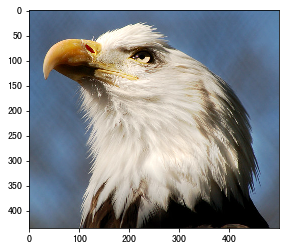

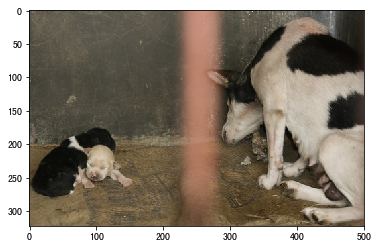

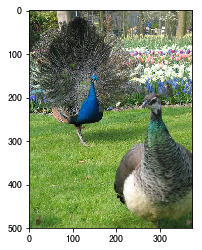

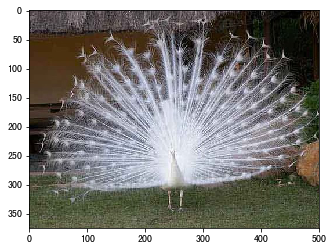

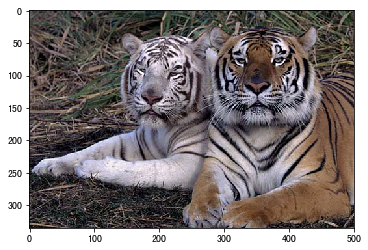

In [19]:

#第五張圖秀不出來,因此設計為秀出下一張,直到跳出五張為止
i =0
pic =0
while pic<5:
    url= df.loc[i,'urls']
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()
        i+=1
        pic+=1
    except:
        i+=1
    

In [31]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for url in url_list:
        try:
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            img_list.append(img)
        except OSError :
            continue
    
    
    return img_list

In [33]:
result

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x435 at 0x1A92B645E80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x322 at 0x1A92B63B710>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500 at 0x1A92B637DA0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x1A92B642898>]

In [32]:
result = img2arr_fromURLs(df.loc[0:5,'urls'])
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉



Total images that we got: 4 


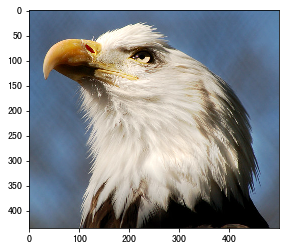

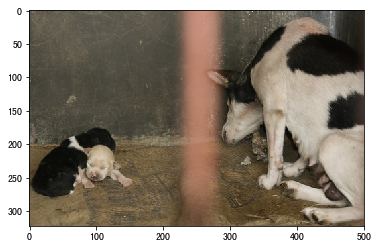

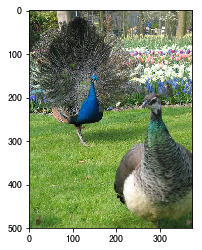

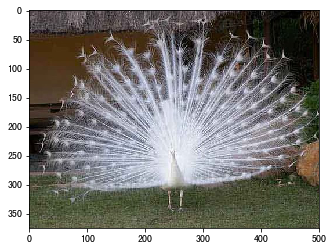

In [34]:
for im_get in result:
    plt.imshow(im_get)
    plt.show()